In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pygtc
import emcee
    
import sys 
sys.path.insert(0, '../src/')

import warnings; warnings.simplefilter('ignore')
from IPython.display import display, Math


In [3]:
labels = ["$M_{*}$", "$\\alpha$", "$\\sigma$"," $\\gamma$", "$\\beta$", "$\\tau$"]

In [4]:
class single_chain:

    def __init__(self, h5_dir, Nstack, Ndim, truths):
        self.dir = h5_dir
        self.Nstack = Nstack
        self.Ndim = Ndim
        self.truths = truths
        self.labels = ["$M_{*}$", "$\\alpha$", "$\\sigma$"," $\\gamma$", "$\\beta$", "$\\tau$"]

        self.read_chain()
        self.stack()
        self.plot_posteriors()

    def read_chain(self):
        reader = emcee.backends.HDFBackend(self.dir) 
        self.samples = reader.get_chain()

    def stack(self):    
        nsteps = self.samples.shape[0]
        ssteps = nsteps - self.Nstack
        s = self.samples[ssteps:nsteps,:,:].shape
        self.end = self.samples[ssteps:nsteps,:,:].reshape(s[0] * s[1], s[2])

    def plot_posteriors(self):
        GTC = pygtc.plotGTC(chains=self.end[:,0:self.Ndim],
                        paramNames = self.labels[0:self.Ndim],
                        truths = self.truths[0:self.Ndim],
                        nContourLevels=3,
                        figureSize=int(8*self.Ndim/3),
                        smoothingKernel=1.1,
                        filledPlots=True,
                        customTickFont={'family':'Arial', 'size':12},
                        customLegendFont={'family':'Arial', 'size':15},
                        customLabelFont={'family':'Arial', 'size':12})

In [5]:
truths = [10.5, 1.9, 0.2, 0, 0, 0] # [10.5, 1.9, 0.2, -0.05, 0.01, 1.2]

labels = ["$M_{*}$", "$\\alpha$", "$\\sigma$"," $\\gamma$", "$\\beta$", "$\\tau$"]

priors = [[9.5,11.5], [-1,7], [0,5], [-2,2], [-3,2], [-2,2]]

Nstack = 300


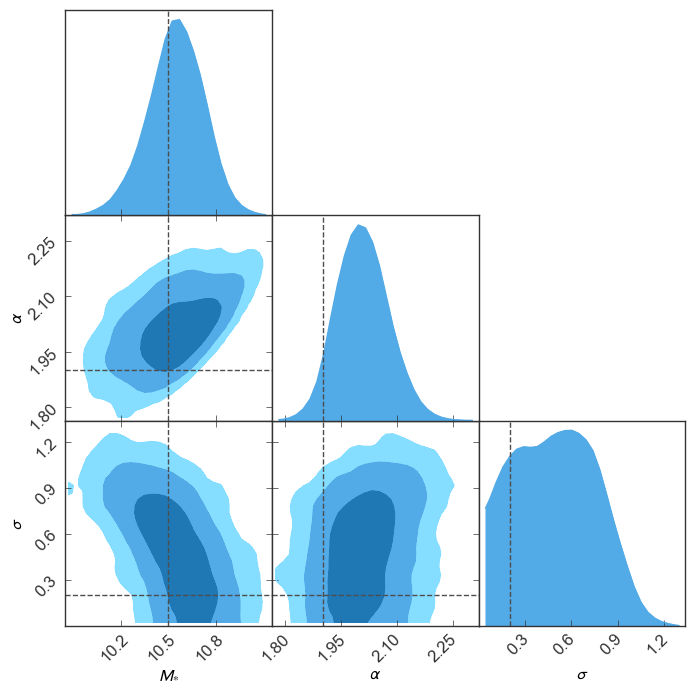

In [6]:
model_A = single_chain("../../../data/simple/model_A/chain.h5", Nstack, 3, truths)

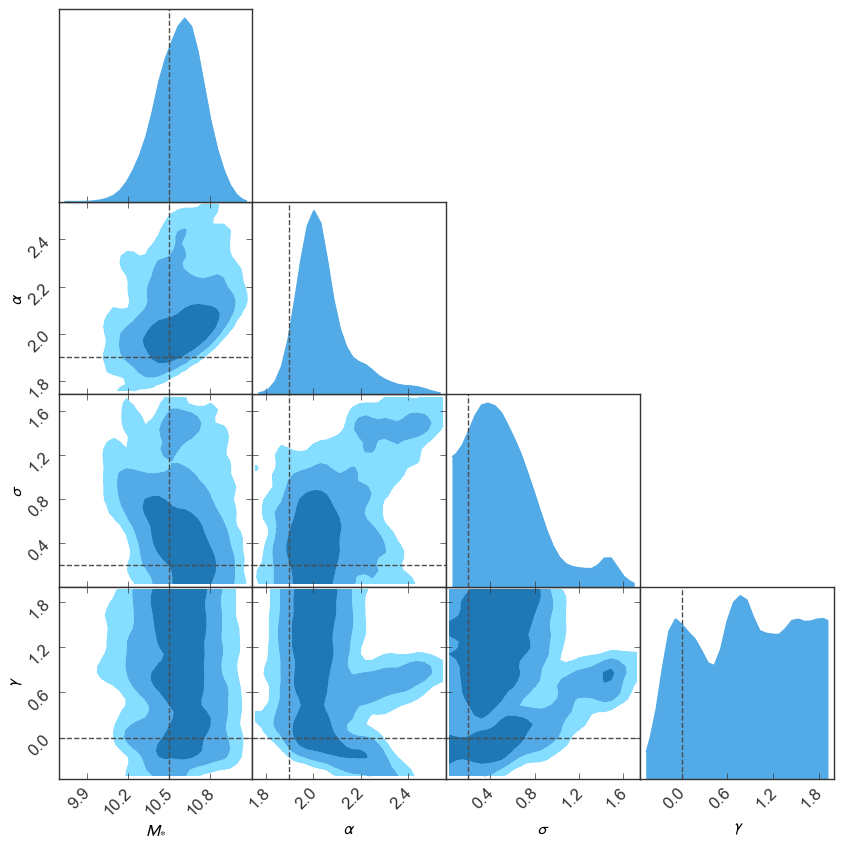

In [7]:
model_B = single_chain("../../../data/simple/model_B/chain.h5", Nstack, 4, truths)

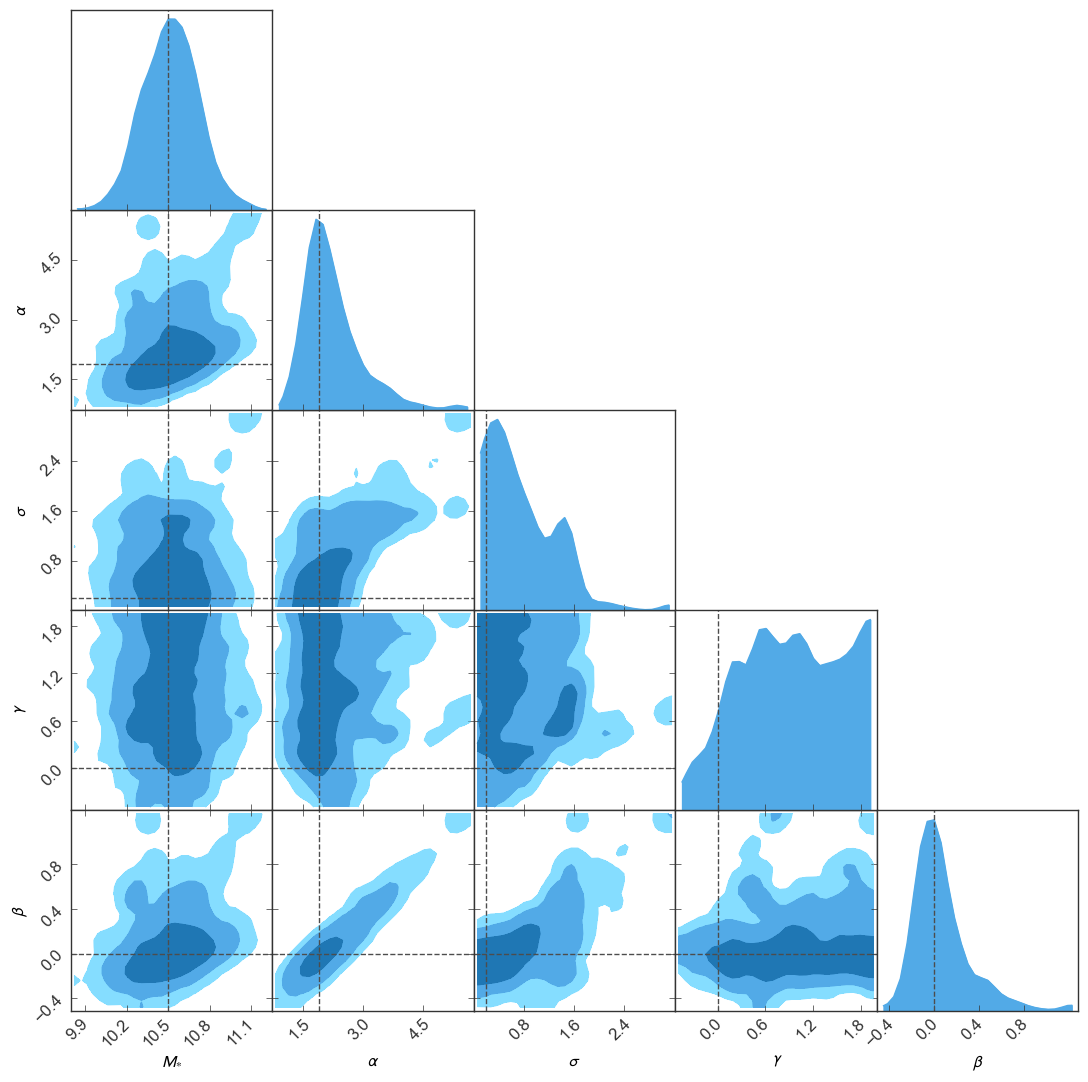

In [8]:
model_C = single_chain("../../../data/simple/model_C/chain.h5", Nstack, 5, truths)

In [9]:
class multi_chain:

    def __init__(self, samplez, Ndim, truths, priors, plabels, mlabels):
        self.samplez = samplez
        self.Nchain = self.samplez.shape[0]
        self.Ndim = Ndim
        self.truths = truths
        self.priors = priors
        self.plabels = plabels
        self.mlabels = mlabels

    def trim(self):
        self.T_samplez = self.samplez[:,:,0:self.Ndim]
        self.T_truths = self.truths[0:self.Ndim]
        self.T_priors = self.priors[0:self.Ndim]
        self.T_plabels = self.plabels[0:self.Ndim]

    def plot_posteriors(self):
        GTC = pygtc.plotGTC(chains=self.T_samplez,
                        paramNames = self.T_plabels,
                        truths = self.T_truths,
                        nContourLevels=2,
                        figureSize=int(8*self.Ndim/3),
                        smoothingKernel=1.1,
                        filledPlots=True,
                        customTickFont={'family':'Arial', 'size':12},
                        customLegendFont={'family':'Arial', 'size':15},
                        customLabelFont={'family':'Arial', 'size':12})
        

    def violin(self, N_param):

        fig, axes = plt.subplots(nrows=N_param, ncols=1, figsize=(6, 12), sharex=True)

        # Loop through posteriors and create violin plots
        for j in range(N_param):
            parts = axes[j].violinplot([self.samplez[i, :, j] for i in range(3)], showmeans=True, showextrema=False)
            axes[j].set_ylabel(self.plabels[j])
            axes[j].axhline(self.truths[j], ls="--", lw=1, color="red")

            for pc in parts['bodies']:
                pc.set_facecolor('cornflowerblue')
                pc.set_edgecolor('navy')
                pc.set_alpha(0.3)

        axes[-1].set_xticks(range(1,4), labels=self.mlabels)
        plt.show()



In [10]:
truths = [10.5, 1.9, 0.2, 0, 0, 0] # [10.5, 1.9, 0.2, -0.05, 0.01, 1.2]

plabels = ["$M_{*}$", "$\\alpha$", "$\\sigma$"," $\\gamma$", "$\\beta$", "$\\tau$"]

priors = [[9.5,11.5], [-1,7], [0,5], [-2,2], [-3,2], [-2,2]]

mlabels = ["model_A", "model_B", "model_C"]

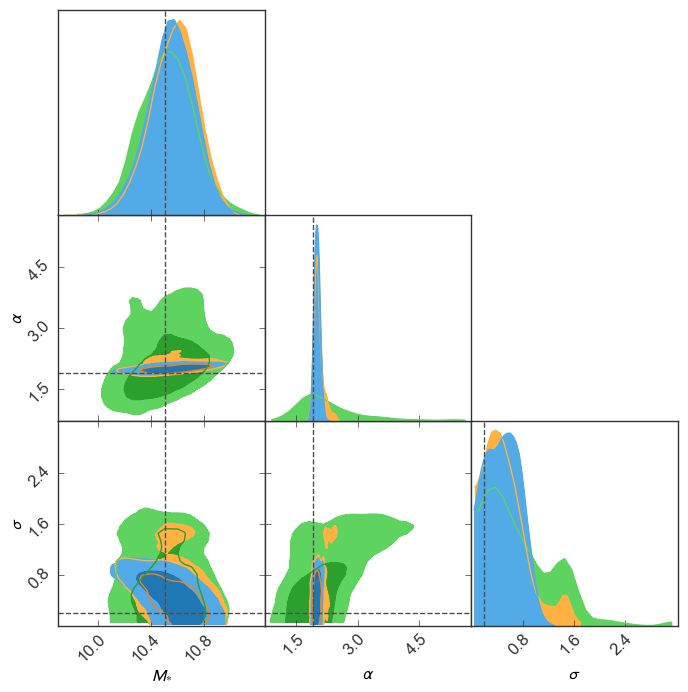

In [11]:
test = multi_chain(np.array([model_A.end, model_B.end, model_C.end]), 3, truths, priors, plabels, mlabels)

test.trim()

test.plot_posteriors()

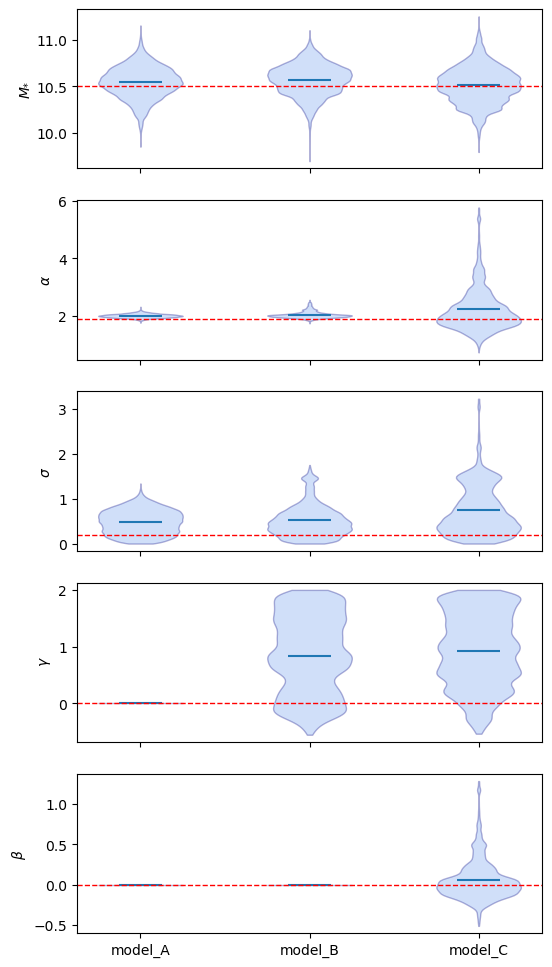

In [27]:
test.violin(5)